In [1]:
import pandas as pd
#import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data públicada en Enero en Kaggle
FIFA18 = pd.read_csv('./datasets/CompleteDataset.csv' ) 
FIFA18.columns
FIFA18.head()
#FIFA18.size

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
"""Indicamos los features a trabajar, dejando a un lado el resto"""

interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)


In [4]:
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [5]:

# Descripción de los features
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Preferred Positions  17981 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [6]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    



In [7]:
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

In [8]:
FIFA18

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0
...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,€1K,GK,50000.0,1000.0
17977,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,€1K,GK,0.0,1000.0
17978,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,ST,60000.0,1000.0
17979,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,CM,60000.0,1000.0


In [9]:
"""Sintetizamos el feature 'Preferred  Positions' extrayendo únicamente el primer cáracter, omitiendo así la doble posición del jugador"""

FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]
FIFA18


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,€1K,GK,50000.0,1000.0,GK
17977,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,€1K,GK,0.0,1000.0,GK
17978,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,ST,60000.0,1000.0,ST
17979,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,CM,60000.0,1000.0,CM


In [10]:

"""Seleccionamos el Grupo donde se encuentra nuestro Perú, Grupo C : \['Francia','Dinamarca','Perú','Australia'\]."""

GroupC = FIFA18[FIFA18.Nationality.isin(['France','Denmark','Peru','Australia'])]
GroupC


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueNum,WageNum,Position
21,A. Griezmann,26,France,88,91,Atlético Madrid,€75M,€150K,LW RW ST,75000000.0,150000.0,LW
29,H. Lloris,30,France,88,88,Tottenham Hotspur,€38M,€165K,GK,38000000.0,165000.0,GK
33,N. Kanté,26,France,87,90,Chelsea,€52.5M,€190K,CM CDM,52500000.0,190000.0,CM
35,P. Pogba,24,France,87,92,Manchester United,€66.5M,€195K,CDM CM,66500000.0,195000.0,CDM
36,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,€65M,€165K,LM RM CAM,65000000.0,165000.0,LM
...,...,...,...,...,...,...,...,...,...,...,...,...
17859,K. Baccus,19,Australia,50,67,Western Sydney Wanderers,€60K,€1K,RB CDM,60000.0,1000.0,RB
17872,M. Bobjerg,19,Denmark,50,65,AC Horsens,€50K,€1K,GK,50000.0,1000.0,GK
17883,N. Dohn,18,Denmark,50,65,AC Horsens,€60K,€1K,RB CM,60000.0,1000.0,RB
17884,M. Moric,17,Australia,50,66,Newcastle Jets,€60K,€1K,ST,60000.0,1000.0,ST


In [11]:
"""Extraemos las medias de los salarios por nacionalidad para el GrupoC"""

GroupC_Average = FIFA18.groupby('Nationality').agg({'ValueNum':np.mean,'WageNum':np.mean})
GroupC_Average

,ValueNum,WageNum
Nationality,,
Afghanistan,2.300000e+05,2000.000000
Albania,2.116714e+06,10514.285714
Algeria,4.884386e+06,17982.456140
Angola,2.473000e+06,9000.000000
Antigua & Barbuda,3.080000e+05,2600.000000
...,...,...
Venezuela,2.912745e+06,10901.960784
Vietnam,3.500000e+05,1000.000000
Wales,1.893496e+06,15861.788618


In [12]:
GroupC_Average = GroupC_Average.reindex(['France','Denmark','Peru','Australia'])
GroupC_Average

,ValueNum,WageNum
Nationality,,
France,3.340557e+06,14279.141104
Denmark,1.596257e+06,7202.312139
Peru,2.178167e+06,6500.000000
Australia,7.339868e+05,4114.537445


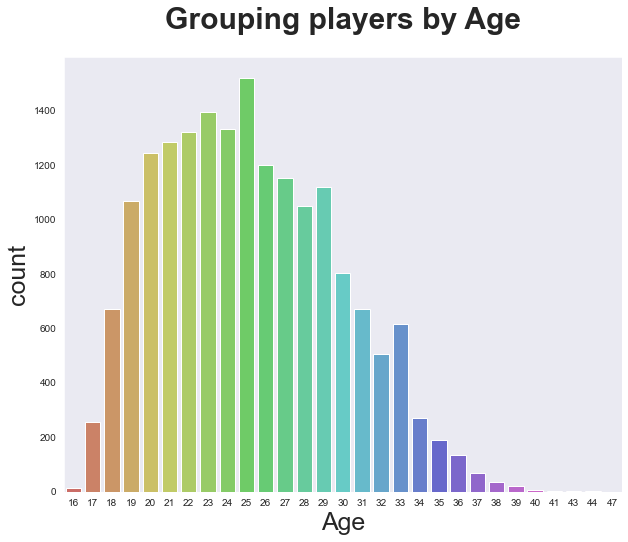

In [13]:
#Visualizamos las edades por un histograma.
#"""

plt.figure(figsize=(10,8))
#sns.set_style("whitegrid")
sns.set_style("dark")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()


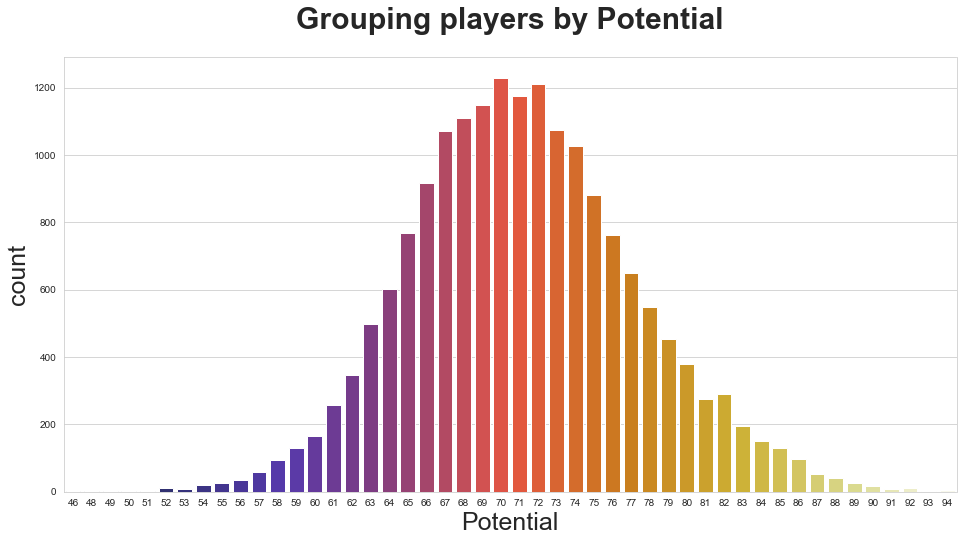

In [14]:
"""## Monto Acomulado (Miles de €)"""

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
#sns.set_style("white")
# style must be one of white, dark, whitegrid, darkgrid, ticks
plt.title('Grouping players by Potential', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
#sns.countplot(x="Potential", data=FIFA18, palette="hls");
#sns.countplot(x="Potential", data=FIFA18, palette="Blues_r");
sns.countplot(x="Potential", data=FIFA18, palette="CMRmap");
#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_sp...
plt.show()

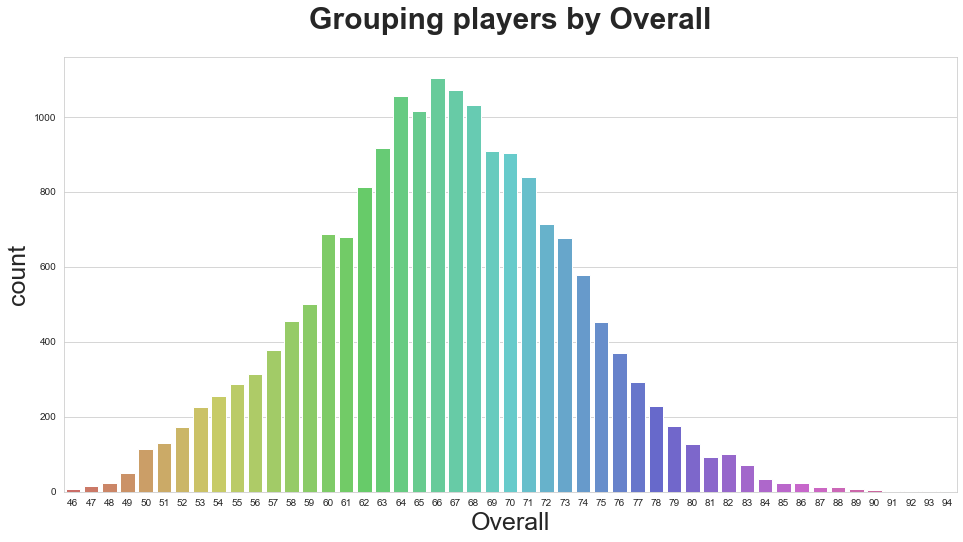

In [15]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

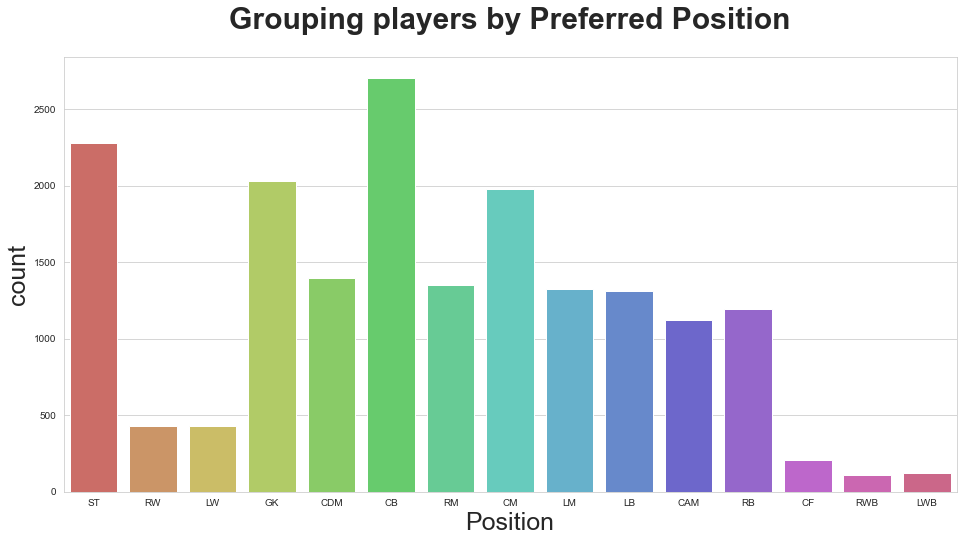

In [16]:
"""## Preferred Position"""

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA18, palette="hls");
plt.show()

In [18]:
"""ST: Stricker
RW: Right wing
LW: Left wing
GK: Goalkeeper
CDM: Center Defense Midfield
CB: Center Back
RM: Right Midfield
CM: Center Midfield
LM: Left Midfield
LB: Left Back
CAM:Center Advance Midfield 
RB: Right Back
CF: Center Forward
RWB: Right Wing Back
LWB: Left Wing Back

## Nationality
"""

FIFA18["Nationality"].value_counts().head(10)

England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64

In [19]:
"""Podemos destacar que una gran cantidad se centraliza en Europa, especialmente en Inglaterra, Alemania, España y Francia

## Value
Buscamos y listamos a los 20 jugadores que más cobran Netamente
"""

sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].reset_index(drop=True)

,Name,Age,Nationality,Club,Position,Value
0,Neymar,25,Brazil,Paris Saint-Germain,LW,€123M
1,L. Messi,30,Argentina,FC Barcelona,RW,€105M
2,L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
3,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
4,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
5,E. Hazard,26,Belgium,Chelsea,LW,€90.5M
6,K. De Bruyne,26,Belgium,Manchester City,RM,€83M
7,T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
8,P. Dybala,23,Argentina,Juventus,ST,€79M
9,G. Higuaín,29,Argentina,Juventus,ST,€77M


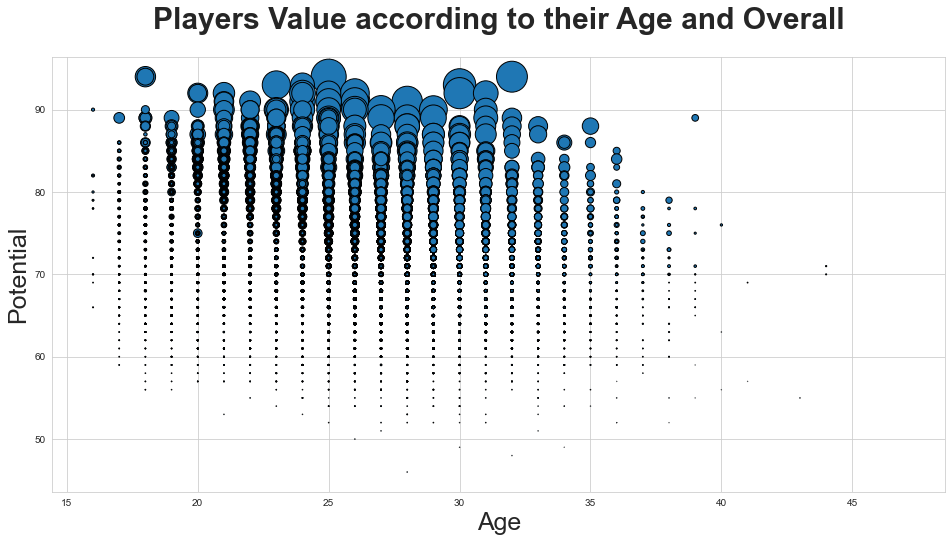

In [21]:
"""Realizamos una vista de disperción de la valoración del jugador por sus edades e ingresos:"""

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Potential', fontsize=25)
age = FIFA18["Age"].values
potential = FIFA18["Potential"].values
value = FIFA18["ValueNum"].values

# Subdividimos los millones para tener una vista legible mediante el área de la ganancia
plt.scatter(age, potential, s = value/100000, edgecolors='black')
plt.show()

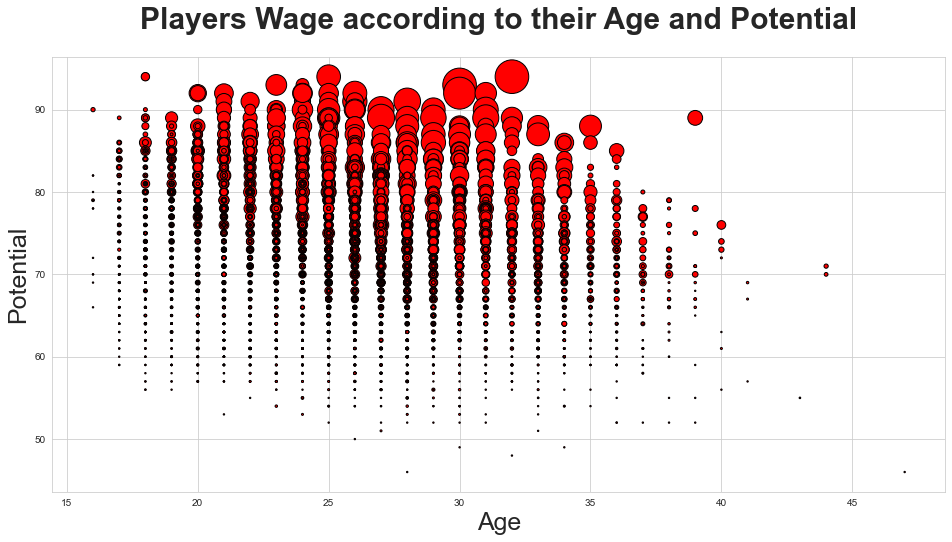

In [22]:
"""### 2.6 Wage
Listamos a los 20 jugadores con más recaudación.
"""

sorted_players = FIFA18.sort_values(["WageNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].reset_index(drop=True)

"""Realizamos una vista de disperción de ingresos del jugador por sus edades y Valoración:"""

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Potential', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Potential', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Potential"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

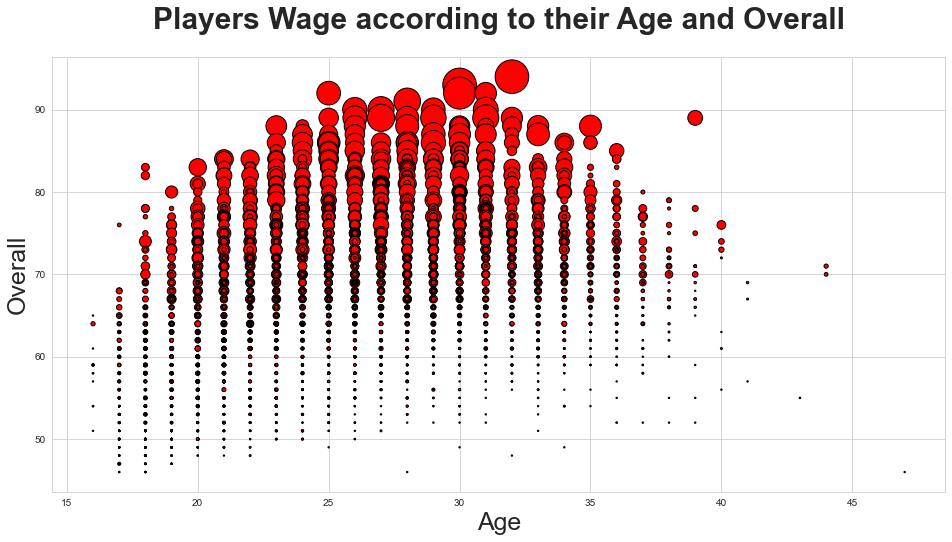

In [23]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

In [24]:
"""## 3 - Best Squad Analysis
Seleccionamos una vista más simplee de los jugadores: Nombre, Edad, Nacionalidad, Valoración, Potencial, Club al que actualmente pertenece(puede estar en blanco),Posición, Recaudación, y Salario.
"""

FIFA18 = FIFA18[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA18.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,ST,€95.5M,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,RW,€105M,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,LW,€123M,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,€97M,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,€61M,€230K
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,ST,€92M,€355K
6,De Gea,26,Spain,90,92,Manchester United,GK,€64.5M,€215K
7,E. Hazard,26,Belgium,90,91,Chelsea,LW,€90.5M,€295K
8,T. Kroos,27,Germany,90,90,Real Madrid CF,CDM,€79M,€340K
9,G. Higuaín,29,Argentina,90,90,Juventus,ST,€77M,€275K


In [25]:
"""### 3.1 Squad of Highest Overall Players
Cúal es la mejor formación deacuerdo a base de hechos de la FIFA?
"""

def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Potential'].idxmax(), 
                         inplace = True)
    
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Potential', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [26]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position              Player Potential  Age                  Club    Value    Wage
      GK       G. Donnarumma        94   18                 Milan   €28.5M    €35K
      RB     Héctor Bellerín        88   22               Arsenal     €21M    €91K
      CB           R. Varane        92   24        Real Madrid CF   €46.5M   €175K
      CB        Sergio Ramos        90   31        Real Madrid CF     €52M   €310K
      LB        L. Hernández        88   21       Atlético Madrid   €13.5M    €36K
     CDM            P. Pogba        92   24     Manchester United   €66.5M   €195K
      CM            N. Kanté        90   26               Chelsea   €52.5M   €190K
     CAM          O. Dembélé        92   20          FC Barcelona     €40M   €150K
      RW            L. Messi        93   30          FC Barcelona    €105M   €565K
      ST   Cristiano Ronaldo        94   32        Real Madrid CF   €95.5M   €565K
      LW              Neymar        94   25   Paris Saint-Germain    €123M   €280

In [27]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position              Player Potential  Age                  Club    Value    Wage
      GK       G. Donnarumma        94   18                 Milan   €28.5M    €35K
      RB     Héctor Bellerín        88   22               Arsenal     €21M    €91K
      CB           R. Varane        92   24        Real Madrid CF   €46.5M   €175K
      CB        Sergio Ramos        90   31        Real Madrid CF     €52M   €310K
      LB        L. Hernández        88   21       Atlético Madrid   €13.5M    €36K
      RM        K. De Bruyne        92   26       Manchester City     €83M   €285K
      CM            N. Kanté        90   26               Chelsea   €52.5M   €190K
      CM            E. Barco        90   18         Independiente    €6.5M     €8K
      LM          C. Eriksen        91   25     Tottenham Hotspur     €65M   €165K
      ST   Cristiano Ronaldo        94   32        Real Madrid CF   €95.5M   €565K
      ST           K. Mbappé        94   18   Paris Saint-Germain   €41.5M    €31

In [28]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position              Player Potential  Age                  Club    Value    Wage
      GK       G. Donnarumma        94   18                 Milan   €28.5M    €35K
      RB     Héctor Bellerín        88   22               Arsenal     €21M    €91K
      CB           R. Varane        92   24        Real Madrid CF   €46.5M   €175K
      CB        Sergio Ramos        90   31        Real Madrid CF     €52M   €310K
      LB        L. Hernández        88   21       Atlético Madrid   €13.5M    €36K
     CDM            P. Pogba        92   24     Manchester United   €66.5M   €195K
     CDM         M. Verratti        91   24   Paris Saint-Germain   €64.5M   €130K
     CAM          O. Dembélé        92   20          FC Barcelona     €40M   €150K
     CAM        Y. Tielemans        90   20             AS Monaco   €23.5M    €35K
     CAM            Coutinho        89   25             Liverpool     €56M   €205K
      ST   Cristiano Ronaldo        94   32        Real Madrid CF   €95.5M   €5

In [29]:
"""Ahora, veamos diferentes posiciones para distintos features."""

def get_best_squad_n(formation, nationality, measurement = 'Potential'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [30]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

In [31]:
"""Para cada formación indicamos la mejor estrategia, sin violar las reglas fundamentales del juego. Ejm: 1 portero, etc,etc."""

squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [32]:
"""# 3 Group C
## 3.1 France

Extramos diferentes posiciónes que pueden generarse para Francia, juntamente con el promedio que generan y sus ratings.
"""

France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad','Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Potential']] = France[['Potential']].astype(float)

France

,Squad,Overall,Potential
Nationality,,,
France,3-4-3,84.55,89.55
France,4-4-2,84.0,89.91
France,4-3-1-2,84.55,89.64
France,4-3-3,84.64,89.91
France,4-2-3-1,84.55,89.91


In [36]:
"""Veamos, la mejor estratégia para Francia sería usar 4-3-3; mientra que las estratégias 4-4-2, and 4-2-3-1 son las que le siguen en dicho orden. Los mejores 11 con una estratégia 4-3-3 brinda actualmente sus mejores partidos hasta la fecha, pero mientras una alineación 4-4-2 le brinda mayor potencial máximo."""

rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential-
Average rating: 89.9
Position         Player Potential  Age                      Club    Value    Wage
      GK      A. Lafont        89   18               Toulouse FC   €11.5M    €10K
      RB       K. Zouma        86   22                Stoke City     €15M    €96K
      CB      R. Varane        92   24            Real Madrid CF   €46.5M   €175K
      CB     A. Laporte        89   23   Athletic Club de Bilbao   €35.5M    €36K
      LB   L. Hernández        88   21           Atlético Madrid   €13.5M    €36K
      RM        A. Pléa        86   24                  OGC Nice   €20.5M    €41K
     CDM       P. Pogba        92   24         Manchester United   €66.5M   €195K
     CAM     O. Dembélé        92   20              FC Barcelona     €40M   €150K
      LM       T. Lemar        91   21                 AS Monaco   €38.5M    €37K
      ST      K. Mbappé        94   18       Paris Saint-Germain   €41.5M    €31K
      ST     A. Martial        90   21         Manchester United 

In [37]:
"""## 3.2 Denmark
Extramos diferentes posiciónes que pueden generarse para Dinamarca, juntamente con el promedio que generan y sus ratings.
"""

Denmark = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Denmark'])).reshape(-1,4),
                       columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Denmark.set_index('Nationality', inplace = True)
Denmark['Potential'] = Denmark['Potential'].astype(float)

Denmark

,Squad,Overall,Potential
Nationality,,,
Denmark,3-4-3,79.09,83.36
Denmark,4-4-2,79.27,84.18
Denmark,4-3-1-2,78.73,83.09
Denmark,4-3-3,79.55,84.27
Denmark,4-2-3-1,79.55,84.18


In [38]:
"""Como podemos apreciar tenemos dos picos de estratégias, la formación 4-2-3-1 o 4-3-3; usando el feature 'Potential', podemos indicar que su mejor es usar 4-3-3. La cual indica que nuestro mejor score en general es 79.55, con un potencial máximo de 84.27"""

rating_433_DEN_Overall, best_list_433_DEN_Overall = get_best_squad_n(squad_433_strict, 'Denmark', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Overall))
print(best_list_433_DEN_Overall)

-Overall-
Average rating: 79.5
Position           Player Overall  Age                       Club    Value    Wage
      GK    K. Schmeichel      83   30             Leicester City     €19M    €65K
      RB      F. Sørensen      77   25                 1. FC Köln    €9.5M    €33K
      CB          S. Kjær      81   28                 Sevilla FC     €16M    €23K
      CB   J. Vestergaard      79   24   Borussia Mönchengladbach   €14.5M    €36K
     LWB       R. Durmisi      73   23        Real Betis Balompié    €4.7M    €18K
     CDM   A. Christensen      81   21                    Chelsea     €23M    €86K
     CAM          D. Wass      80   28           RC Celta de Vigo   €14.5M    €33K
      CM   M. Krohn-Dehli      79   34                 Sevilla FC    €6.5M    €24K
      RM      L. Andersen      76   22    Grasshopper Club Zürich     €11M    €21K
      ST     N. Jørgensen      79   26                  Feyenoord   €15.5M    €25K
      LM       C. Eriksen      87   25          Tottenha

In [39]:
rating_433_DEN_Potential, best_list_433_DEN_Potential = get_best_squad_n(squad_433_strict, 'Denmark', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Potential))
print(best_list_433_DEN_Potential)

-Potential-
Average rating: 84.3
Position           Player Potential  Age                       Club    Value    Wage
      GK    K. Schmeichel        84   30             Leicester City     €19M    €65K
      RB      F. Sørensen        81   25                 1. FC Köln    €9.5M    €33K
      CB   J. Vestergaard        84   24   Borussia Mönchengladbach   €14.5M    €36K
      CB          S. Kjær        82   28                 Sevilla FC     €16M    €23K
     LWB       R. Durmisi        80   23        Real Betis Balompié    €4.7M    €18K
     CDM   A. Christensen        89   21                    Chelsea     €23M    €86K
     CAM       K. Dolberg        88   19                       Ajax   €16.5M    €10K
     CAM       V. Fischer        82   23            1. FSV Mainz 05    €9.5M    €23K
      RM      L. Andersen        83   22    Grasshopper Club Zürich     €11M    €21K
      ST       Y. Poulsen        83   23                 RB Leipzig     €11M    €58K
      LM       C. Eriksen       

In [40]:
"""## 3.3 Peru
Extramos diferentes posiciónes que pueden generarse para Perú, juntamente con el promedio que generan y sus ratings.
"""

Peru = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Peru'])).reshape(-1,4),
                    columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Peru.set_index('Nationality', inplace = True)
Peru[['Overall', 'Potential']] = Peru[['Overall', 'Potential']].astype(float)

Peru

,Squad,Overall,Potential
Nationality,,,
Peru,3-4-3,73.09,75.91
Peru,4-4-2,73.91,76.27
Peru,4-3-1-2,71.82,75.36
Peru,4-3-3,73.09,76.09
Peru,4-2-3-1,72.91,76.09


In [41]:
"""Para nuestro Perú, tenemos con una puntuación general la formación 4-4-2 . De la misma forma su potencial se inclina ccon 76.27 sobre la media, seleccionando como esta la mejor formación que hoy en día cuenta."""

rating_442_PER_Overall, best_list_442_PER_Overall = get_best_squad_n(squad_442_strict, 'Peru', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_PER_Overall))
print(best_list_442_PER_Overall)

-Overall-
Average rating: 73.9
Position         Player Overall  Age                       Club    Value   Wage
      GK     P. Gallese      74   27                        NaN       €0     €0
     RWB    R. Revoredo      70   31                        NaN       €0     €0
      CB    C. Zambrano      76   27          PAOK Thessaloniki    €7.5M    €1K
      CB   A. Rodríguez      73   33                        NaN       €0     €0
      LB       Y. Yotún      71   27   Orlando City Soccer Club    €2.7M    €7K
      RM     P. Hurtado      76   26          Vitória Guimarães    €8.5M   €14K
     CDM       R. Tapia      72   21                  Feyenoord    €4.2M    €9K
     CAM       Y. Reyna      70   23     Vancouver Whitecaps FC    €2.4M    €6K
      LM    A. Carrillo      77   26                    Watford   €10.5M   €15K
      ST      J. Farfán      78   32           Lokomotiv Moscow      €8M   €45K
      ST     R. Ruidíaz      76   26           Monarcas Morelia      €9M   €16K


In [42]:
rating_442_PER_Potential, best_list_442_PER_Potential = get_best_squad_n(squad_442_strict, 'Peru', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_PER_Potential))
print(best_list_442_PER_Potential)

-Potential-
Average rating: 76.3
Position        Player Potential  Age                          Club    Value   Wage
      GK    P. Gallese        76   27                           NaN       €0     €0
     RWB   R. Revoredo        70   31                           NaN       €0     €0
      CB   C. Zambrano        78   27             PAOK Thessaloniki    €7.5M    €1K
      CB    A. Callens        78   25   New York City Football Club    €3.6M    €6K
      LB      Y. Yotún        72   27      Orlando City Soccer Club    €2.7M    €7K
      RM       A. Polo        79   22              Monarcas Morelia    €1.7M    €6K
     CDM      R. Tapia        78   21                     Feyenoord    €4.2M    €9K
     CAM      Y. Reyna        75   23        Vancouver Whitecaps FC    €2.4M    €6K
      LM   A. Carrillo        78   26                       Watford   €10.5M   €15K
      ST     J. Farfán        78   32              Lokomotiv Moscow      €8M   €45K
      ST    R. Ruidíaz        77   26      

In [43]:
"""![Paolo](https://github.com/jtaquia/Exploracion-de-datos/blob/master/Paolo_Guerrero.jpg?raw=1)

## 3.5 Australia
Extramos diferentes posiciónes que pueden generarse para Australia, juntamente con el promedio que generan y sus ratings.
"""

Australia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Australia'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Australia.set_index('Nationality', inplace = True)
Australia[['Overall', 'Potential']] = Australia[['Overall', 'Potential']].astype(float)

Australia

,Squad,Overall,Potential
Nationality,,,
Australia,3-4-3,72.73,77.18
Australia,4-4-2,73.00,77.09
Australia,4-3-1-2,73.73,77.64
Australia,4-3-3,73.55,77.36
Australia,4-2-3-1,73.27,77.36


In [44]:
"""De forma similar Australia tiene un score general de 73.55 con la formación 4-3-3 actualmente, por otro lado el potencial máximo que puede alcanzar usando una formación 4-2-3-1 es de 77.90"""

rating_433_AU_Overall, best_list_433_AU_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_AU_Overall))
print(best_list_433_AU_Overall)

-Overall-
Average rating: 85.5
Position          Player Overall  Age                  Club    Value    Wage
      GK         Ederson      83   23       Manchester City     €26M    €87K
      RB      Dani Alves      84   34   Paris Saint-Germain      €9M   €115K
      CB    Thiago Silva      88   32   Paris Saint-Germain     €34M   €175K
      CB      David Luiz      86   30               Chelsea     €33M   €190K
      LB         Marcelo      87   29        Real Madrid CF     €38M   €250K
     CDM        Casemiro      85   25        Real Madrid CF     €42M   €195K
     CAM        Coutinho      86   25             Liverpool     €56M   €205K
     CAM         Willian      84   28               Chelsea   €31.5M   €200K
      RM   Douglas Costa      82   26              Juventus     €24M   €115K
      CF           Jonas      83   33            SL Benfica   €16.5M    €21K
      LW          Neymar      92   25   Paris Saint-Germain    €123M   €280K


In [45]:
rating_4312_AU_Potential, best_list_4312_AU_Potential = get_best_squad_n(squad_4312_strict, 'Australia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_AU_Potential))
print(best_list_4312_AU_Potential)

-Potential-
Average rating: 77.6
Position         Player Potential  Age                     Club    Value   Wage
      GK        M. Ryan        80   25   Brighton & Hove Albion      €8M   €36K
      RB      A. Behich        76   26                Bursaspor    €4.1M   €17K
      CB   T. Sainsbury        77   25                      NaN       €0     €0
      CB      B. Wright        77   24             Bristol City    €2.8M   €23K
      LB    A. Gersbach        79   20             Rosenborg BK    €1.3M    €4K
      CM     A. O'Neill        80   18           Fleetwood Town    €925K    €8K
     CAM        A. Mooy        78   26        Huddersfield Town   €10.5M   €52K
     CAM       T. Rogić        77   24                   Celtic      €7M   €42K
     CAM    D. De Silva        77   20   Central Coast Mariners    €875K    €1K
      ST    J. Maclaren        77   23          SV Darmstadt 98    €5.5M   €23K
      CF     A. Taggart        76   24              Perth Glory    €1.5M    €6K


In [46]:
"""## 4 - Final Comparison

A continuación muestro mediante barrras las puntuciones totales y potencial máximo, para tener una mejor panorama.
"""

teams = ('France', 'Denmark', 'Peru', 'Australia')
index = np.arange(len(teams))
average_overall = [rating_433_FR_Overall, rating_433_DEN_Overall, rating_442_PER_Overall,rating_433_AU_Overall]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5,color='brrb')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.axvline(rating_442_PER_Overall)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

NameError: name 'rating_433_FR_Overall' is not defined

In [ ]:
index = np.arange(len(teams))
average_potential = [rating_442_FR_Potential, rating_433_DEN_Potential, rating_442_PER_Potential,rating_433_DEN_Potential]

plt.figure(figsize=(16,8))
plt.barh(index, average_potential, align='center',color='brrb', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.axvline(x=rating_442_PER_Potential)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Potential', fontsize=25)
plt.title('Average Potential Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [ ]:
GroupC_Average

total_value = GroupC_Average.ValueNum.values * 1000

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [ ]:
average_wage = GroupC_Average.WageNum.values

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros (€)', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()